In [1]:
import yaml
import numpy as np
import matplotlib.pyplot as plt

from shaperenderer.geometry import (
    Plane,
    Quadrant,
    ShapeGenerator,
    MetzlerShape
)
from shaperenderer.renderer import (
    Camera,
    Renderer,
    Object3D
)

In [2]:
with open(
    "config.yaml",
    "r",
    encoding="utf-8"
) as reader:
    cfg = yaml.safe_load(reader)

## Step 1: configure renderer

In [3]:
camera = Camera()
camera.setSphericalPosition(
    r=cfg["camera"]["distance"],
    theta=cfg["camera"]["elevation"],
    phi=cfg["camera"]["rotation"]
)

renderer = Renderer(
    imgsize=(
        cfg["renderer"]["image_size"],
        cfg["renderer"]["image_size"]
    ),
    dpi=cfg["renderer"]["dpi"],
    bgcolor=cfg["renderer"]["background"],
    format=cfg["renderer"]["format"]
)

object_params = {
    "facecolor": cfg["object"]["facecolor"],
    "edgecolor": cfg["object"]["edgecolor"],
    "edgewidth": cfg["object"]["edgewidth"]
}

<Figure size 256x256 with 0 Axes>

## Step 2: create shape skeleton using `ShapeGenerator`

In [4]:
shapegen = ShapeGenerator(random_state=4567)
shape = shapegen.generate()

print(shape)
print(type(shape))

uuubbllld
<class 'shaperenderer.geometry.ShapeString'>


## Example 1: create and render a pair of same shapes

In [5]:
same_pair = [
    # shape 1
    Object3D(
        shape=MetzlerShape(shape),
        **object_params
    ),
    # shape 2
    Object3D(
        shape=MetzlerShape(shape),
        **object_params
    )
]

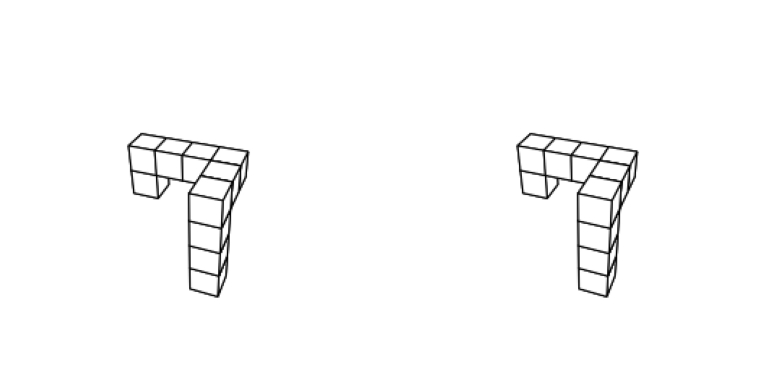

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4), layout="tight")
for i, obj3D in enumerate(same_pair):
    renderer.render(obj3D, camera)
    image_numpy = renderer.save_figure_to_numpy()

    ax[i].imshow(image_numpy)
    ax[i].axis("off")

## Example 2: create and render a pair of different (mirrored) shapes

In [7]:
different_pair = [
    # shape 1 (normal)
    Object3D(
        shape=MetzlerShape(shape),
        **object_params
    ),
    # shape 2 (mirror)
    Object3D(
        shape=MetzlerShape(shape.reflect(over=Plane(2))), # mirror canonical view of shape 1 around Z-axis
        **object_params
    )
]

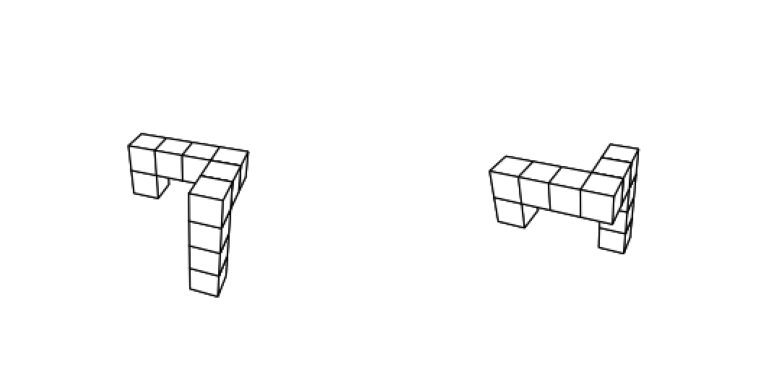

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4), layout="tight")
for i, obj3D in enumerate(different_pair):

    renderer.render(obj3D, camera)
    image_numpy = renderer.save_figure_to_numpy()

    ax[i].imshow(image_numpy)
    ax[i].axis("off")

## Example 3: change shape skeleton

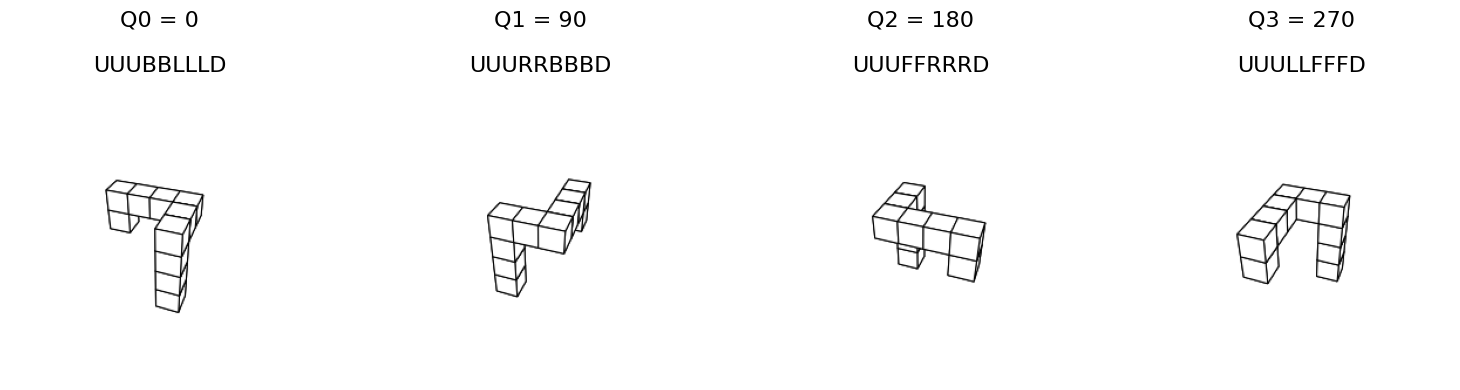

In [9]:
fig = plt.figure(figsize=(16, 4))

for q in (0, 1, 2, 3):
    # changing the viewing quadrant
    # corresponds to rotating the shape by 90 degrees around Z-axis
    shape_changed = shape.change_quadrant(Quadrant(q))  

    obj3D = Object3D(
        shape=MetzlerShape(shape_changed),
        **object_params
    )
    renderer.render(obj3D, camera)
    image_numpy = renderer.save_figure_to_numpy()

    ax = fig.add_subplot(1, 4, q+1)
    ax.imshow(image_numpy)
    ax.axis("off")
    ax.set_title(
        f"""Q{q} = {abs(Quadrant(q).angle)}\n\n{str(shape_changed).upper()}""",
        fontsize=16
    )